In [129]:
import pandas as pd #Data Frames
import numpy as np  #Basic Math Commands
import matplotlib.pyplot as plt
nicered = "#E6072A"
niceblu = "#424FA4"
nicegrn = "#6DC048"

#import data set into R like data frame
burea = pd.read_csv('burea_subset.csv')
#look at first few rows of data set
burea.columns = (['x','y','res','perm'])
burea[1:5]


,x,y,res,perm
1,15,60,249.17,489.67
2,15,75,243.93,457.78
3,18,27,249.13,360.07
4,18,84,247.02,473.68


In [63]:
#Calculate Covariance

def covariance(x, y):
    m_x = np.mean(x) # Mean X
    m_y = np.mean(y) # Mean Y
    N = len(x) * 1.0 # convert to float
    if N != len(y):
        print "Warning: Covariance cannot be calculated on series of unequal length"
    cov = 0
    for (x_i, y_i) in zip(x,y):
        cov += (x_i - m_x)*(y_i - m_y)
        # print x_i, y_i
    return cov / (N-1)
    

In [75]:
#Calculate Pearson's Correlation Coefficient

def pearsonr(x, y):
    cov = covariance(x,y)
    std_x = np.std(x, ddof=1) #calculate standard deviations, using built in formula 
    std_y = np.std(y, ddof=1) #set degrees of freedom to 1 to line upw ith matlab
    return cov / (std_x * std_y)


#### 1) Scatterplot for resisitivity and permeability

Pearson's Correlation coefficient  -0.420595888765
Covariance  -90.5312955977


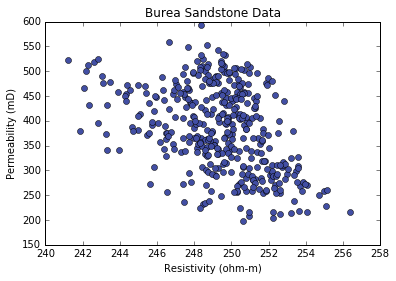

In [141]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(burea['res'],burea['perm'], "o", color=niceblu)
ax.set_xlabel("Resistivity (ohm-m)")
ax.set_ylabel("Permeability (mD)")
ax.set_title("Burea Sandstone Data", fontsize=12)
plt.hold

rho = pearsonr(burea['res'],burea['perm'])
print "Pearson's Correlation coefficient ", rho
print "Covariance ", covariance(burea['res'],burea['perm'])
